In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = pd.read_csv('Dataset/cards.csv')
path_df = pd.DataFrame(path)
# For column names that contain space, replace the space with an underscore
path_df.columns = [c.replace(' ', '_') for c in path_df.columns]
path_df.head()

class_index                   filepaths        labels card_type data_set
0            0  train/ace of clubs/001.jpg  ace of clubs       ace    train
1            0  train/ace of clubs/002.jpg  ace of clubs       ace    train
2            0  train/ace of clubs/003.jpg  ace of clubs       ace    train
3            0  train/ace of clubs/004.jpg  ace of clubs       ace    train
4            0  train/ace of clubs/005.jpg  ace of clubs       ace    train

#### Perform a variety of pre-processing steps on images

* Convert images to grayscale
* Remove blurry images
* Rotate images as needed
* Undo mirror image
* Rectify images as needed
* Normalize and align images to be in the same spatial coordinates


In [33]:
# Convert images to grayscale

def convert_to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

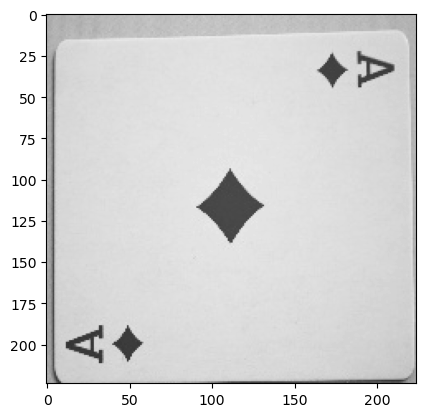

In [50]:
# Test if image is gray

test_colored_image = cv2.imread('Dataset/train/ace of diamonds/001.jpg')
test_gray_img = convert_to_grayscale(test_colored_image)
plt.imshow(test_gray_img, cmap='gray', vmin=0, vmax=255)

Image: train/ace of diamonds/112.jpg
Blur score: 40.6705862674451


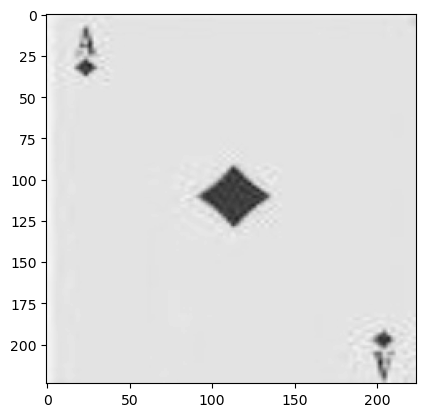


Image: train/ace of diamonds/115.jpg
Blur score: 48.115702775655706


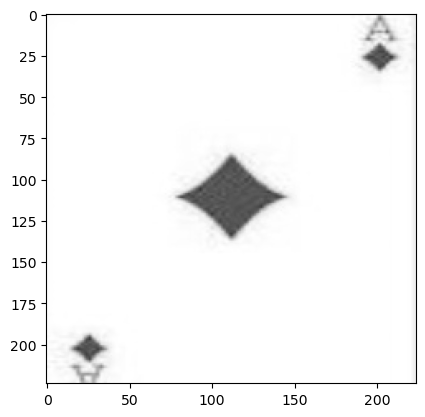


Image: train/ace of hearts/094.jpg
Blur score: 35.35740321261443


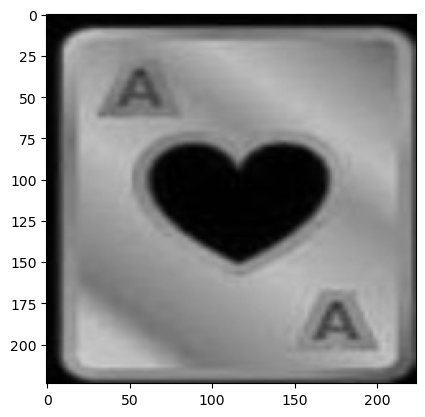


Image: train/ace of hearts/116.jpg
Blur score: 37.376078625114594


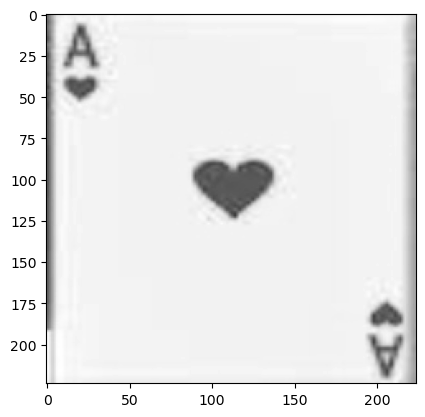


Image: train/ace of hearts/119.jpg
Blur score: 45.61489118848528


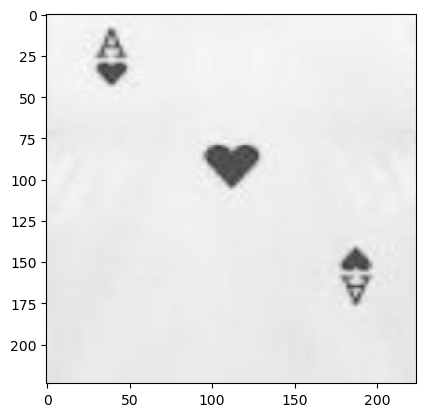


Image: train/ace of hearts/149.jpg
Blur score: 20.29659582326334


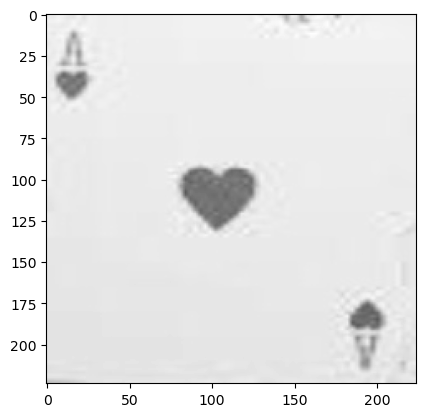


Image: train/ace of hearts/150.jpg
Blur score: 30.11428451538086


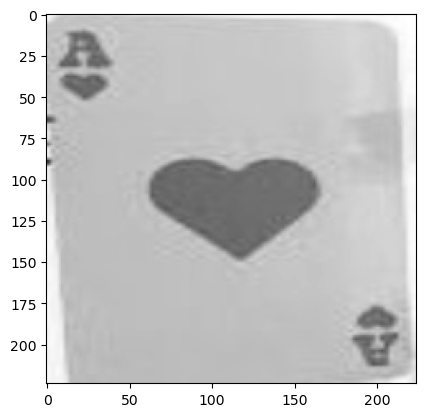


Image: train/ace of hearts/151.jpg
Blur score: 18.735570790816325


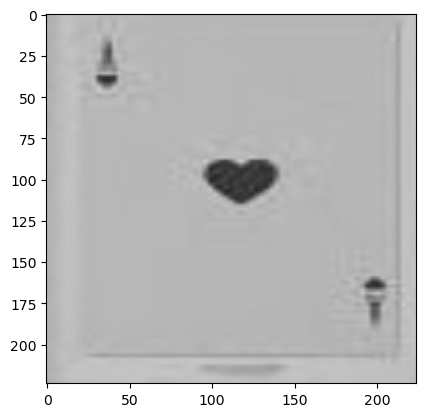


Image: train/ace of hearts/160.jpg
Blur score: 44.08373186936829


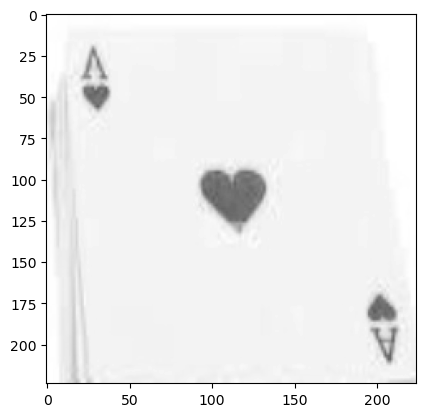


Image: train/ace of hearts/164.jpg
Blur score: 37.93445835963531


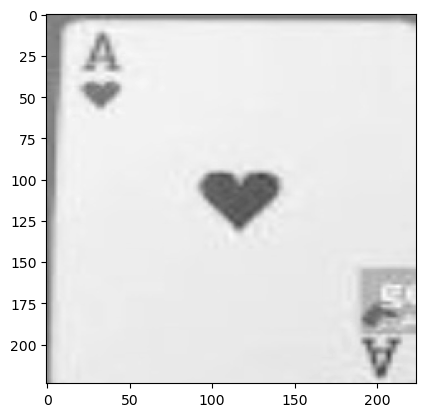


Image: train/ace of spades/087.jpg
Blur score: 18.185786033163264


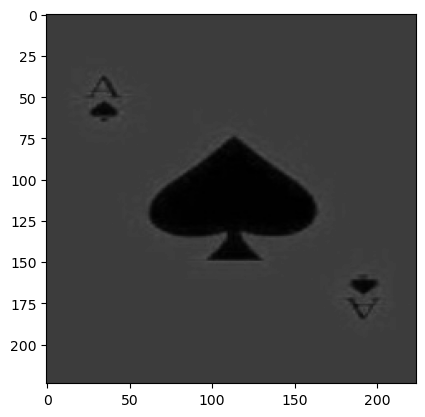


Image: train/ace of spades/089.jpg
Blur score: 47.46452177707874


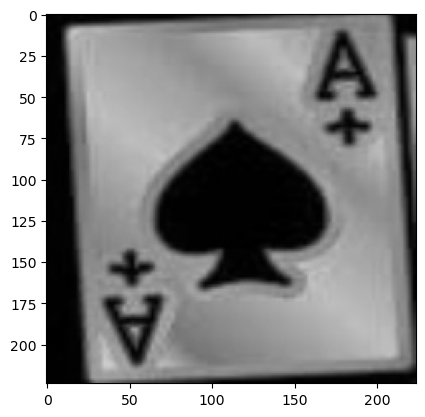


Image: train/eight of diamonds/094.jpg
Blur score: 30.603891686070515


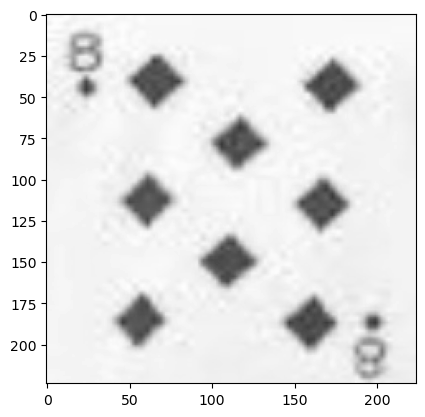


Image: train/eight of diamonds/128.jpg
Blur score: 49.138631144646354


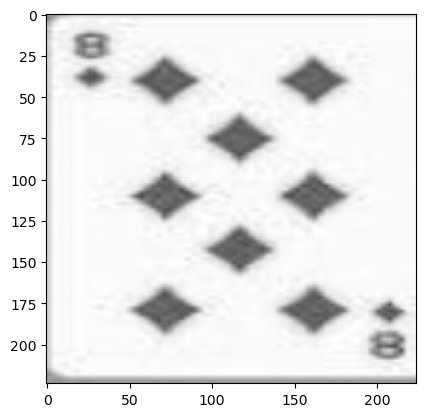


Image: train/eight of diamonds/143.jpg
Blur score: 41.515368822265394


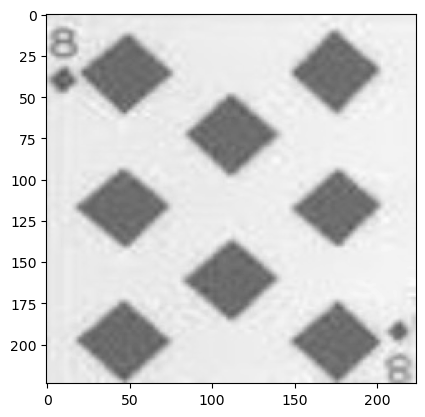


Image: train/eight of hearts/100.jpg
Blur score: 30.823035862981058


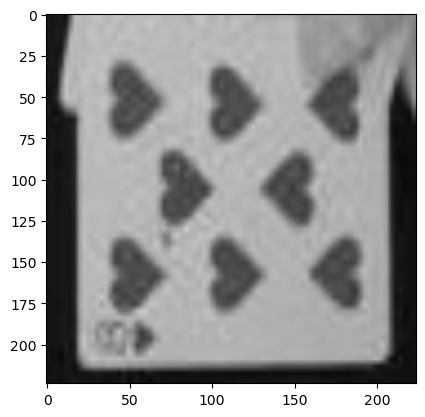


Image: train/eight of spades/064.jpg
Blur score: 46.1963282545027


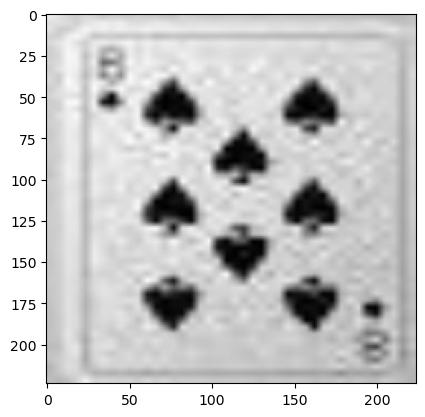


Image: train/five of diamonds/078.jpg
Blur score: 34.10983324944601


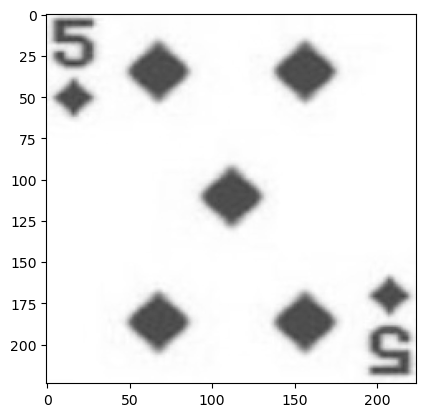


Image: train/five of hearts/077.jpg
Blur score: 29.419605151458065


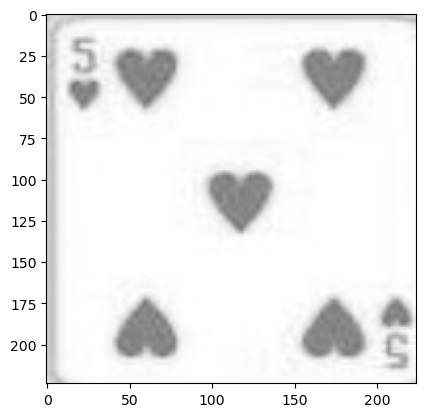


Image: train/five of hearts/081.jpg
Blur score: 40.59187646569534


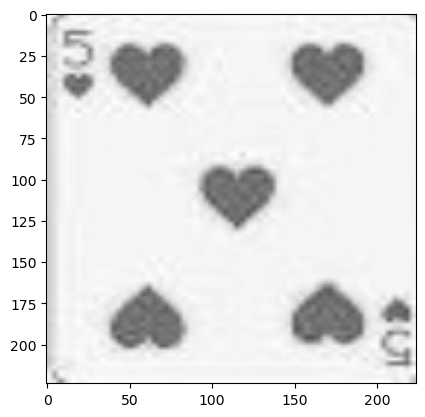


Image: train/five of hearts/100.jpg
Blur score: 17.229033761300528


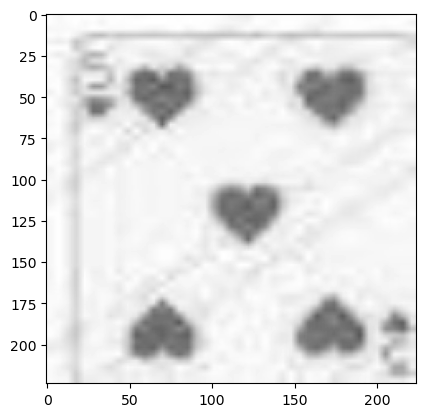


Image: train/five of hearts/113.jpg
Blur score: 35.550846313943666


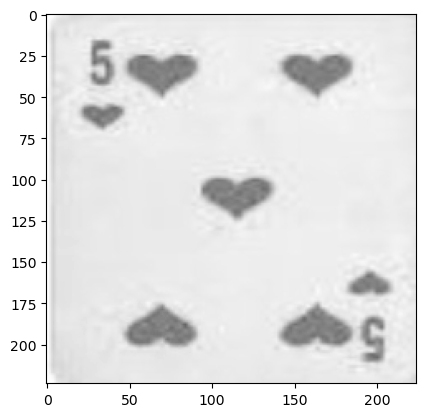


Image: train/five of hearts/122.jpg
Blur score: 48.64377387609645


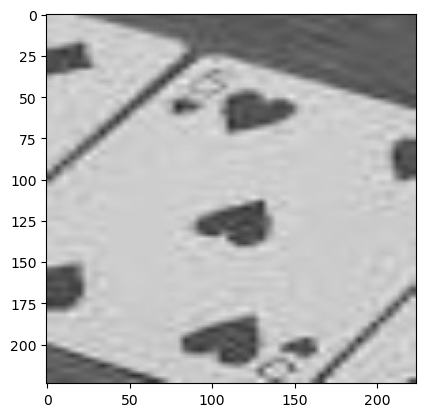


Image: train/five of hearts/136.jpg
Blur score: 32.159796812096424


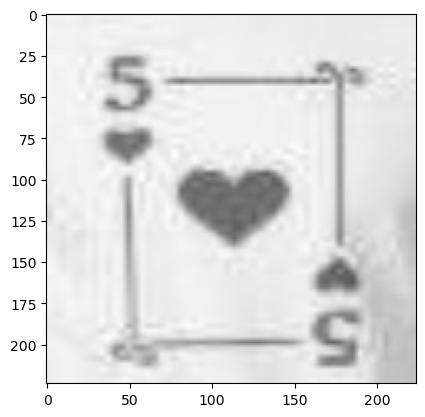


Image: train/five of spades/096.jpg
Blur score: 28.08435857916613


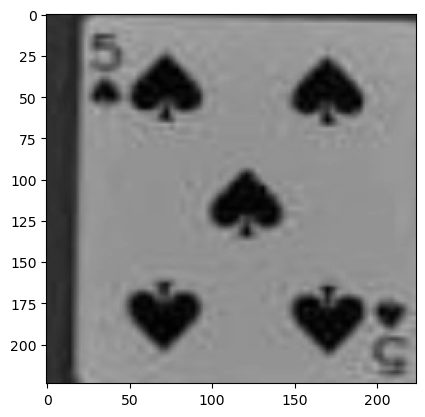


Image: train/five of spades/100.jpg
Blur score: 36.601012813404466


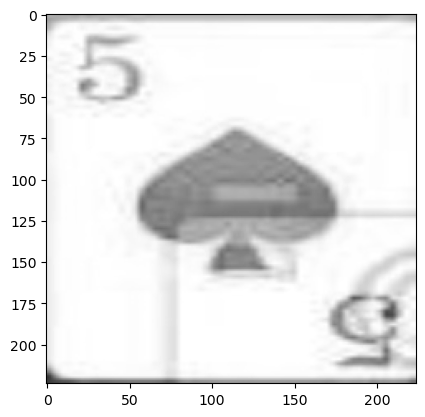


Image: train/five of spades/109.jpg
Blur score: 38.8335423940224


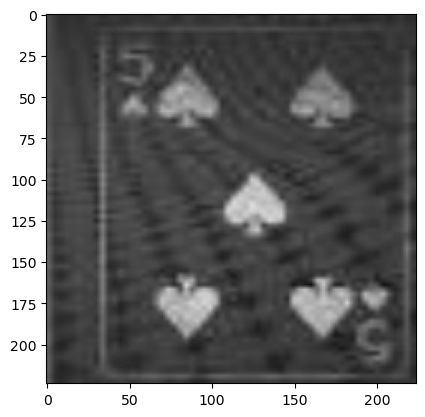


Image: train/four of clubs/087.jpg
Blur score: 28.835917550690326


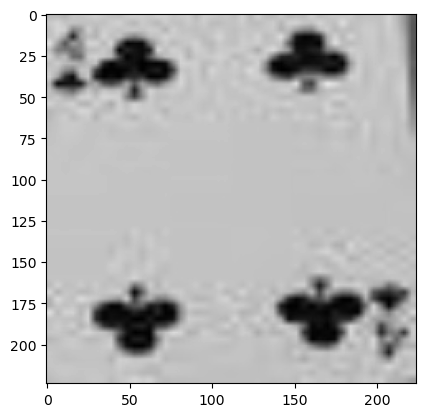


Image: train/four of diamonds/073.jpg
Blur score: 38.43831353900533


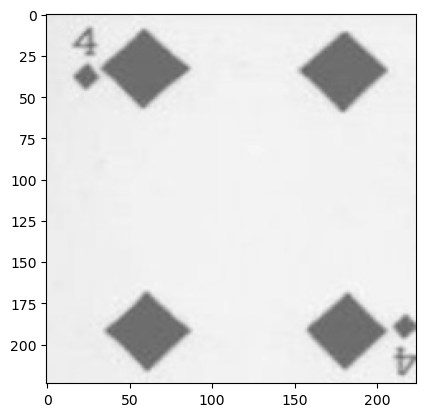


Image: train/four of diamonds/092.jpg
Blur score: 22.845833815718034


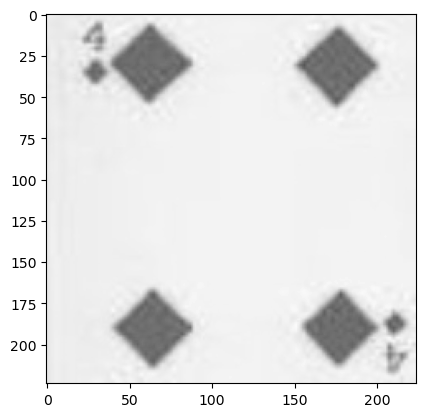


Image: train/four of diamonds/095.jpg
Blur score: 41.25809138916473


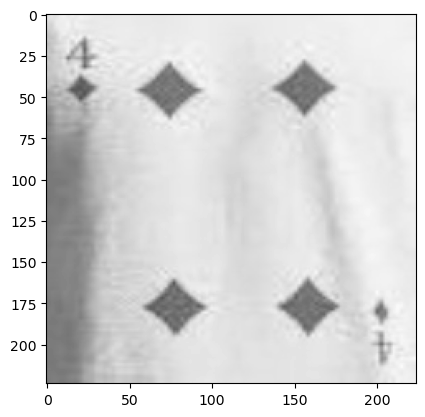


Image: train/four of hearts/076.jpg
Blur score: 16.04747266662166


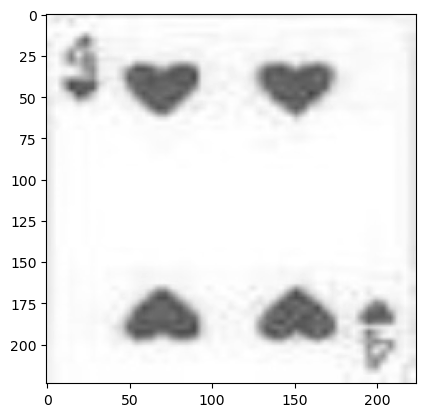


Image: train/four of hearts/082.jpg
Blur score: 19.82146820233594


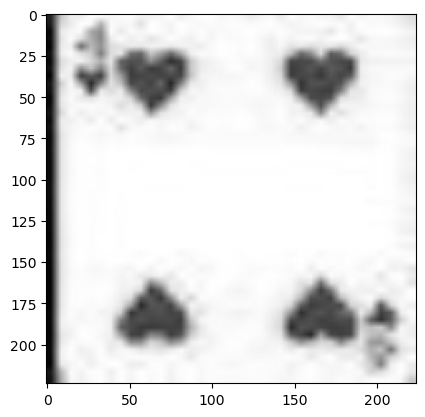


Image: train/four of hearts/084.jpg
Blur score: 40.232521314116525


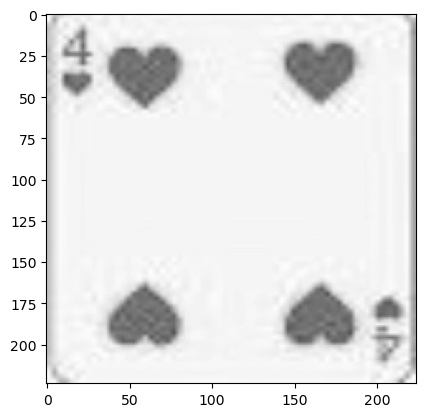


Image: train/four of hearts/089.jpg
Blur score: 33.46311203314333


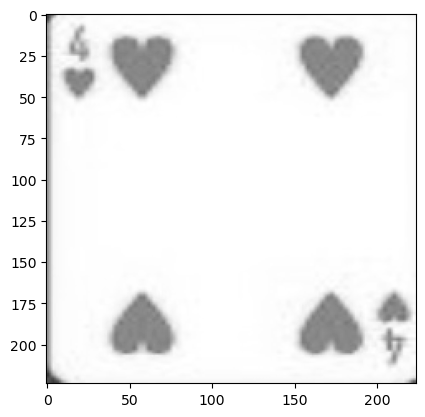


Image: train/four of hearts/105.jpg
Blur score: 28.800840657832776


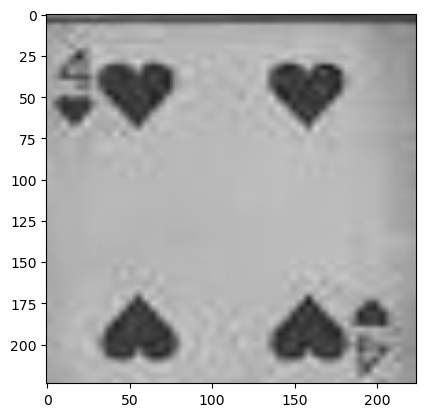


Image: train/four of hearts/106.jpg
Blur score: 47.097568570351115


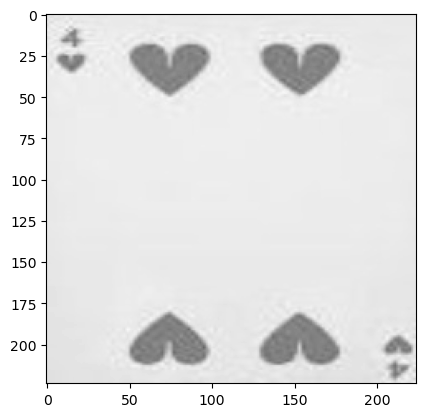


Image: train/four of hearts/107.jpg
Blur score: 14.765722866209286


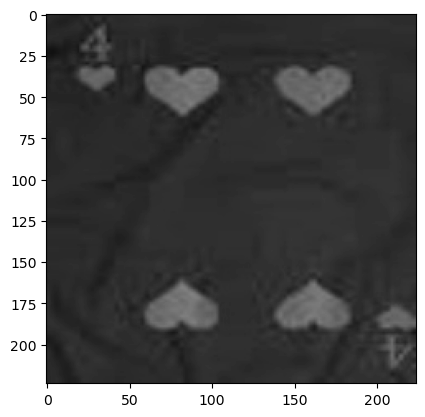


Image: train/four of hearts/108.jpg
Blur score: 28.420803044647634


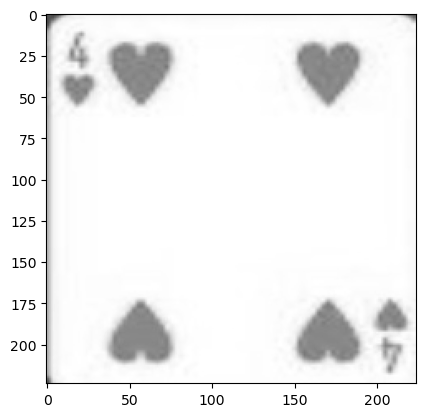


Image: train/four of hearts/119.jpg
Blur score: 18.699911254984492


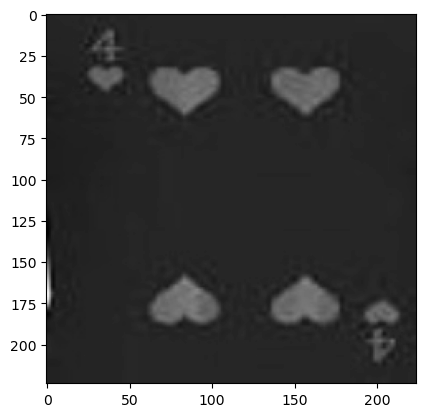


Image: train/four of hearts/140.jpg
Blur score: 49.19989255009865


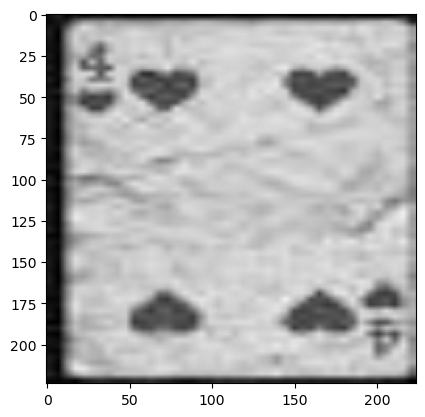


Image: train/four of hearts/144.jpg
Blur score: 38.14811860814982


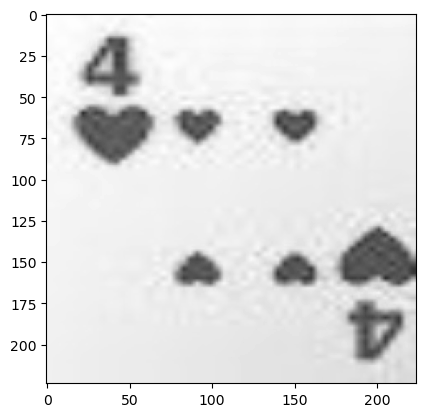


Image: train/four of spades/082.jpg
Blur score: 24.0278021329048


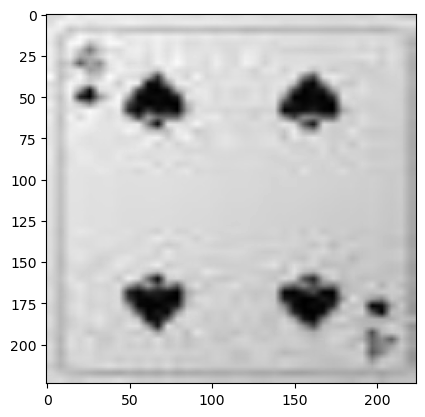


Image: train/jack of hearts/123.jpg
Blur score: 18.161809136797018


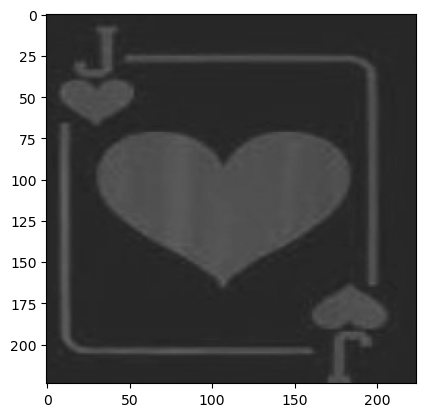


Image: train/nine of diamonds/065.jpg
Blur score: 14.785832231117258


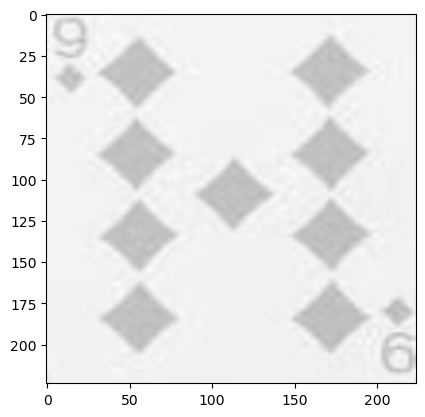


Image: train/nine of hearts/072.jpg
Blur score: 49.58144255053843


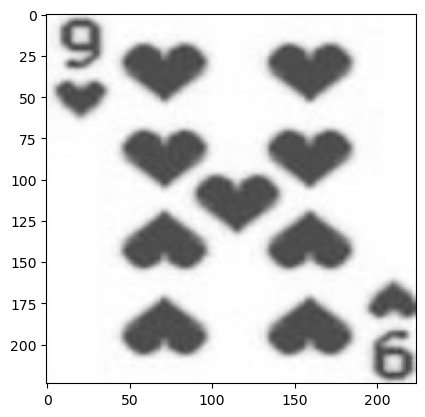


Image: train/seven of diamonds/039.jpg
Blur score: 37.881600817656924


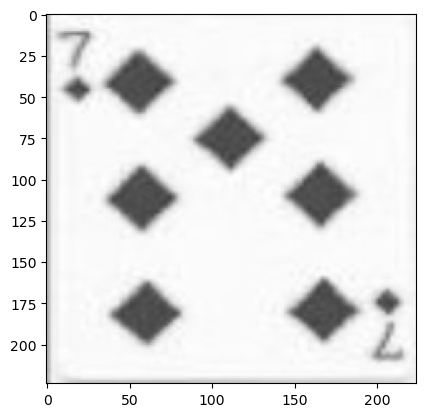


Image: train/seven of diamonds/063.jpg
Blur score: 46.493702166778554


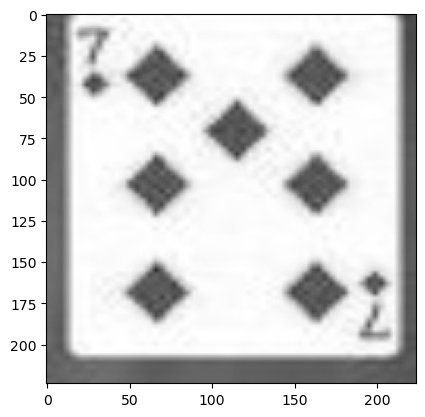


Image: train/seven of diamonds/080.jpg
Blur score: 38.468368097723946


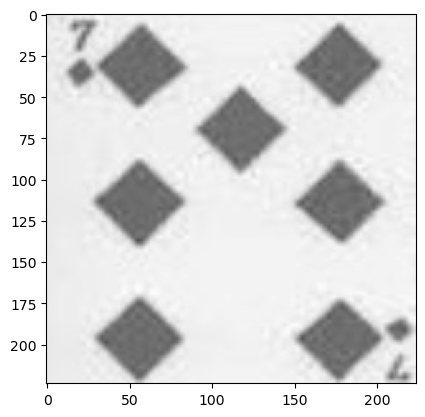


Image: train/seven of hearts/066.jpg
Blur score: 47.0713407551433


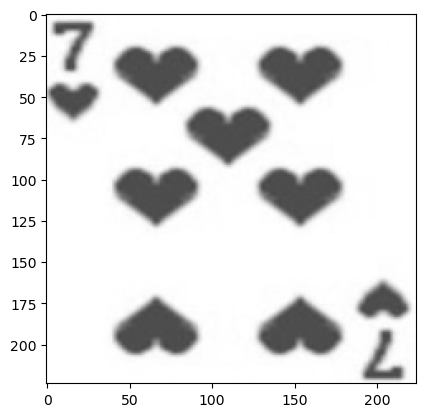


Image: train/seven of hearts/130.jpg
Blur score: 48.3878929189025


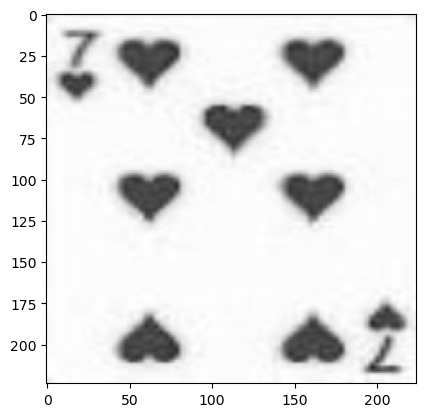


Image: train/six of diamonds/084.jpg
Blur score: 31.269448047973174


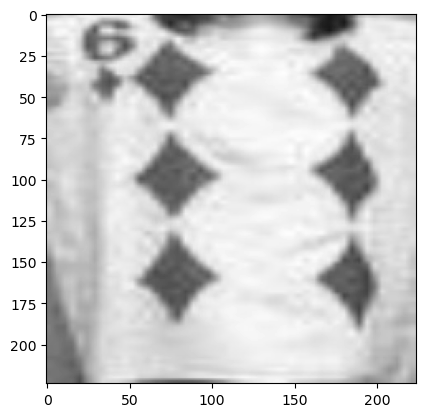


Image: train/six of diamonds/097.jpg
Blur score: 25.833783830915177


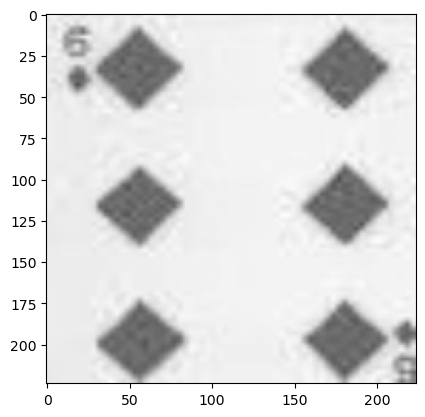


Image: train/six of hearts/067.jpg
Blur score: 15.836165447624362


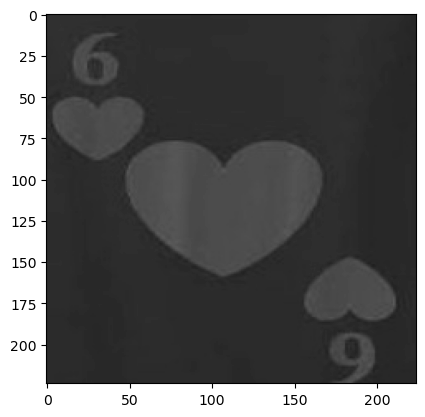


Image: train/six of hearts/068.jpg
Blur score: 14.612543730872812


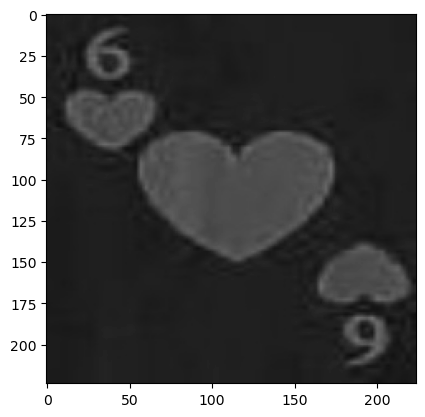


Image: train/six of hearts/074.jpg
Blur score: 9.991430140395602


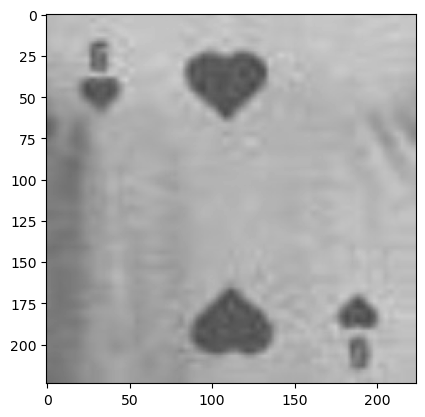


Image: train/six of hearts/076.jpg
Blur score: 23.02887831604119


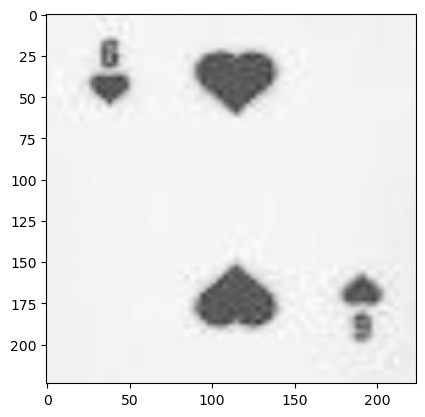


Image: train/six of hearts/087.jpg
Blur score: 7.255859375


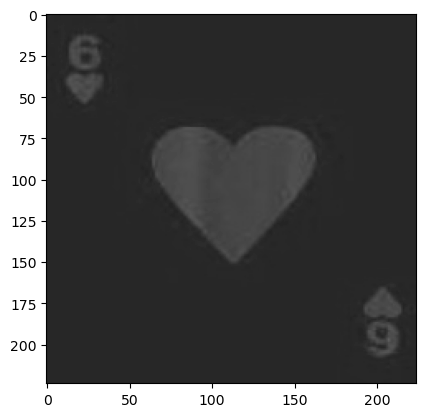


Image: train/six of hearts/095.jpg
Blur score: 29.73256117381041


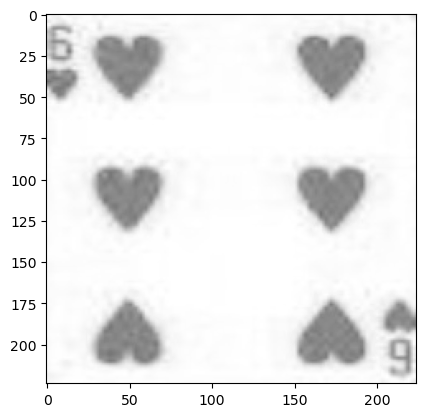


Image: train/six of hearts/118.jpg
Blur score: 46.86268755496913


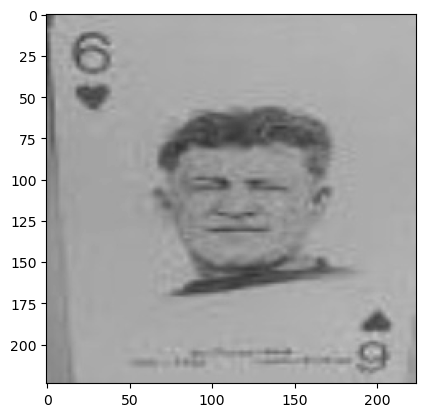


Image: train/six of hearts/124.jpg
Blur score: 16.792649866093797


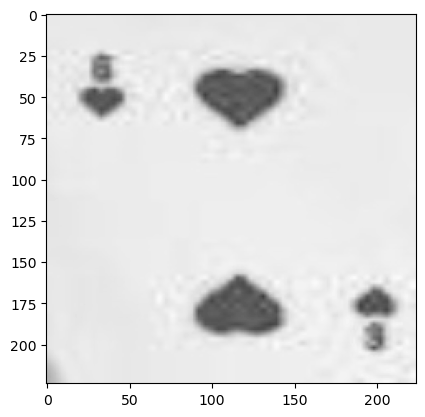


Image: train/ten of diamonds/113.jpg
Blur score: 22.902283893332587


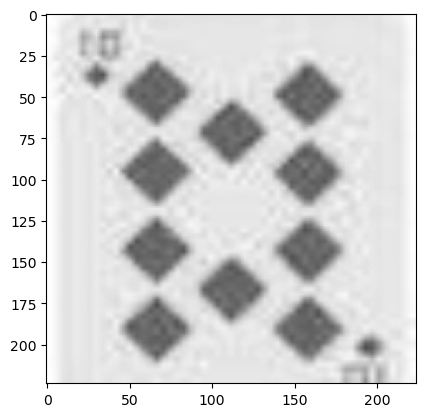


Image: train/ten of hearts/114.jpg
Blur score: 26.39670001859716


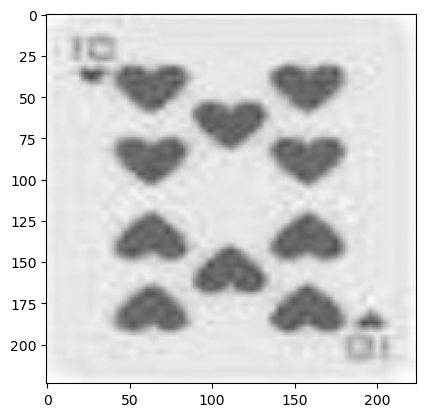


Image: train/ten of hearts/119.jpg
Blur score: 46.90704649321887


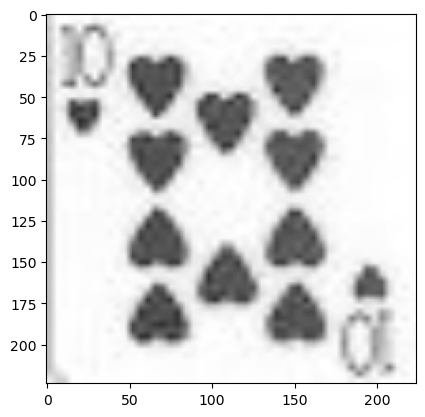


Image: train/three of diamonds/054.jpg
Blur score: 32.60863716311378


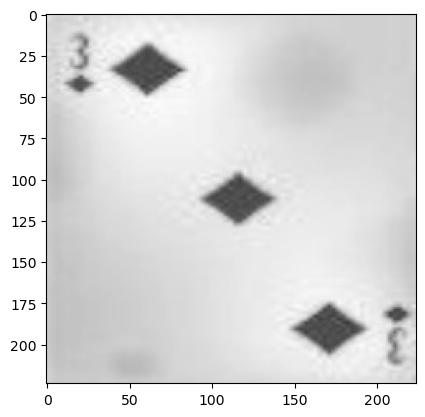


Image: train/three of diamonds/081.jpg
Blur score: 22.45272617427472


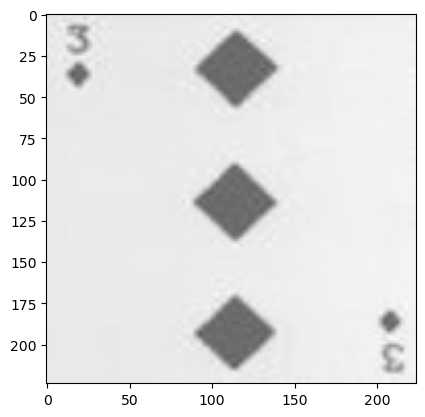


Image: train/three of diamonds/085.jpg
Blur score: 13.03994208085244


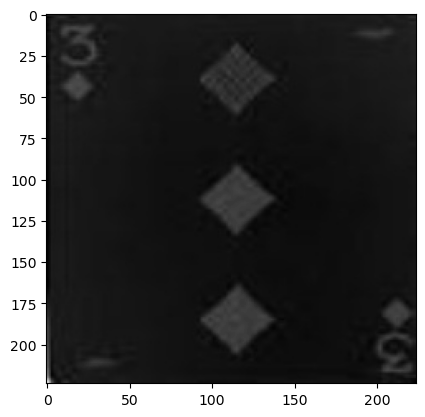


Image: train/three of diamonds/104.jpg
Blur score: 17.20806644380912


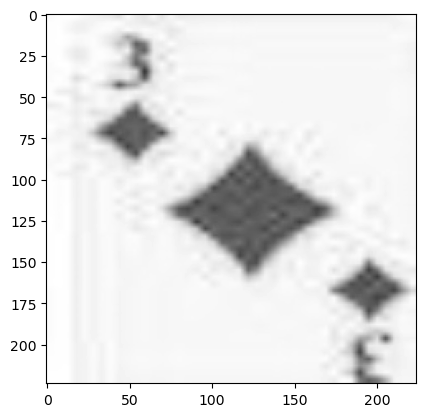


Image: train/three of diamonds/109.jpg
Blur score: 23.008560897210693


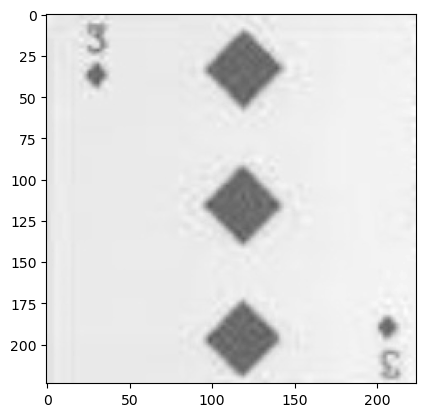


Image: train/three of diamonds/111.jpg
Blur score: 42.10216003792924


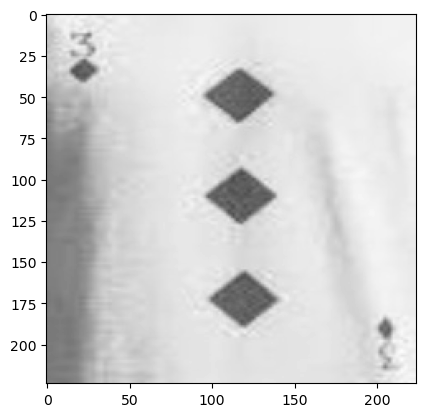


Image: train/three of diamonds/137.jpg
Blur score: 26.594885969102403


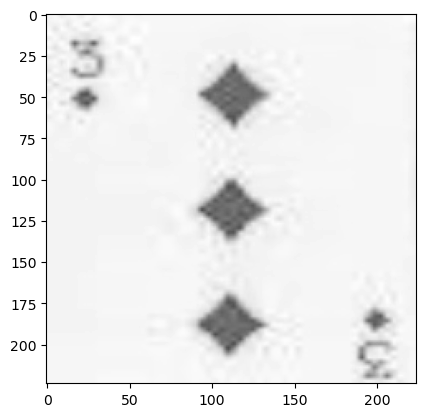


Image: train/three of diamonds/152.jpg
Blur score: 15.986287191280567


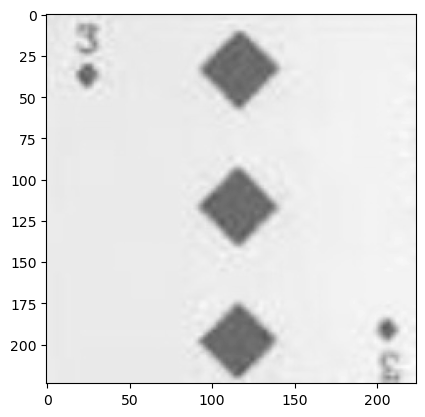


Image: train/three of hearts/076.jpg
Blur score: 21.055723845685637


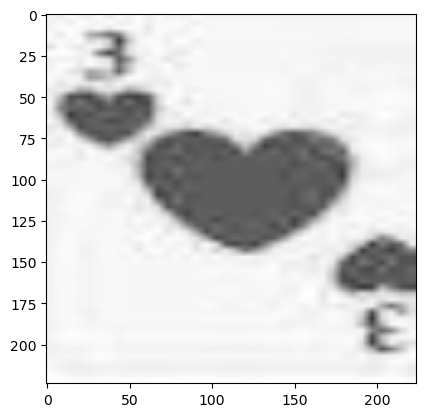


Image: train/three of hearts/086.jpg
Blur score: 13.458904298133326


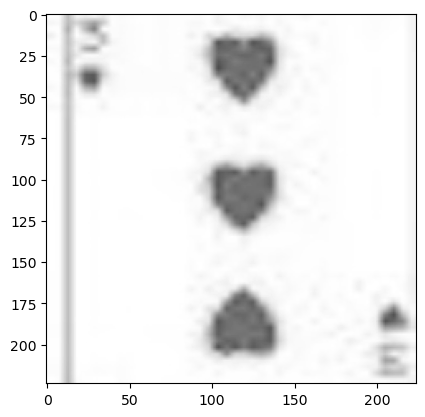


Image: train/three of hearts/103.jpg
Blur score: 47.28618588938111


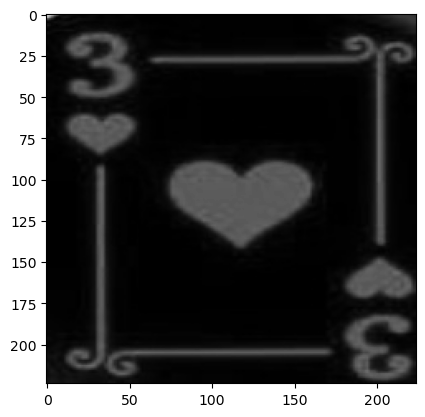


Image: train/three of hearts/112.jpg
Blur score: 32.19547384811014


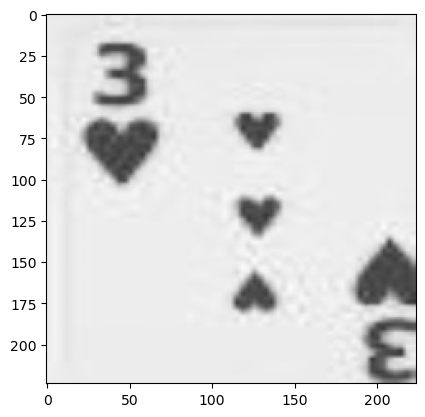


Image: train/three of hearts/113.jpg
Blur score: 35.24923013181102


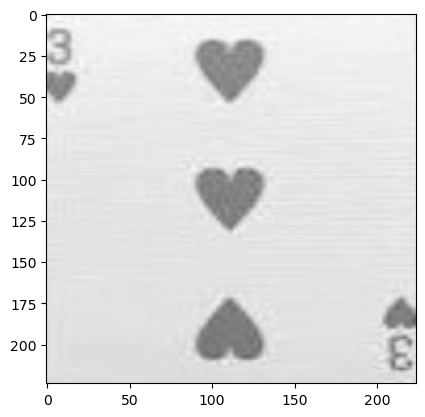


Image: train/two of diamonds/061.jpg
Blur score: 46.88772157806498


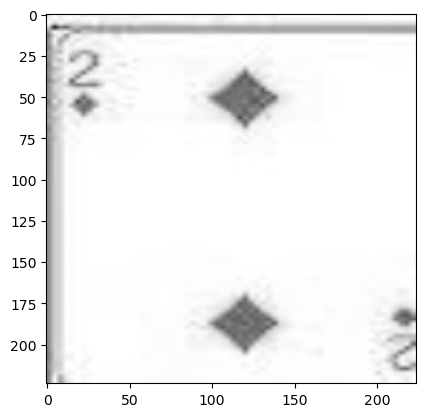


Image: train/two of diamonds/068.jpg
Blur score: 29.78206609061041


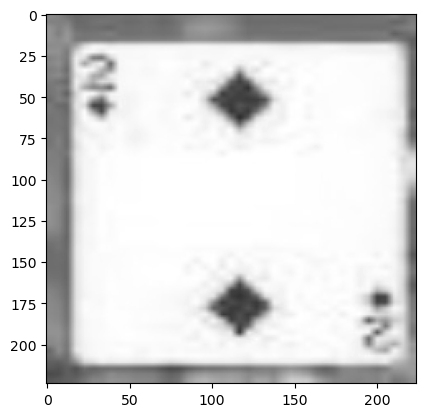


Image: train/two of diamonds/071.jpg
Blur score: 40.83244202346515


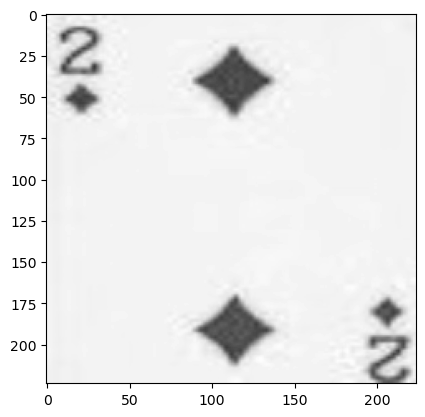


Image: train/two of diamonds/078.jpg
Blur score: 25.314353118286387


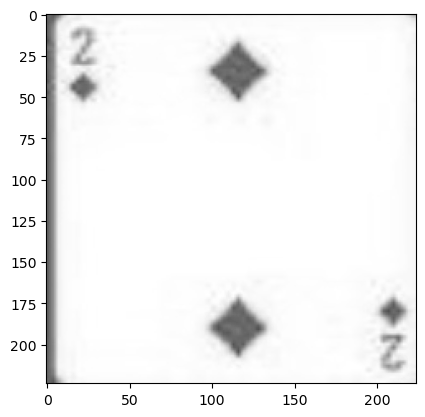


Image: train/two of diamonds/083.jpg
Blur score: 47.06771972565688


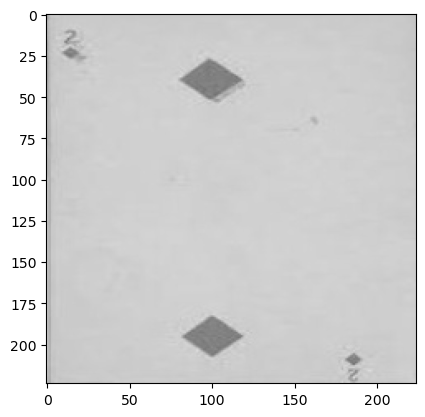


Image: train/two of diamonds/110.jpg
Blur score: 48.325035427273036


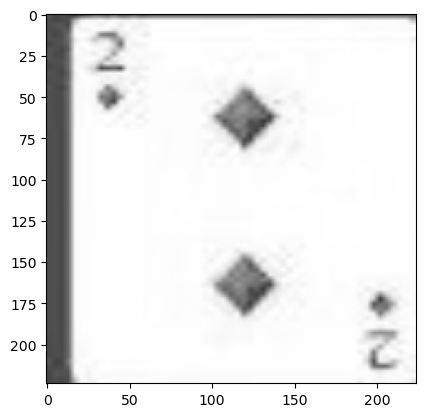


Image: train/two of diamonds/127.jpg
Blur score: 37.43776014138142


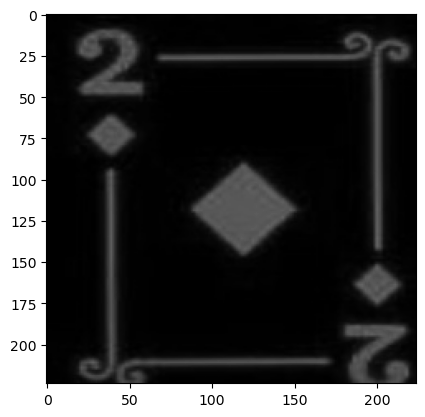


Image: train/two of diamonds/131.jpg
Blur score: 36.184090206792874


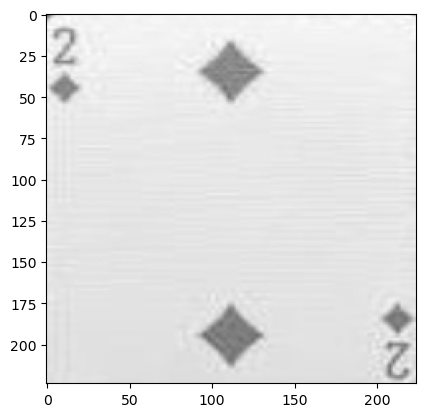


Image: train/two of hearts/071.jpg
Blur score: 36.86535372529513


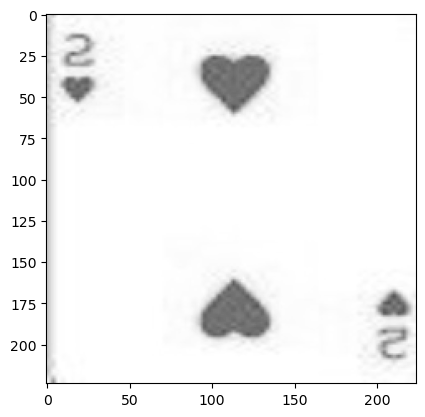


Image: train/two of hearts/090.jpg
Blur score: 45.3472909633441


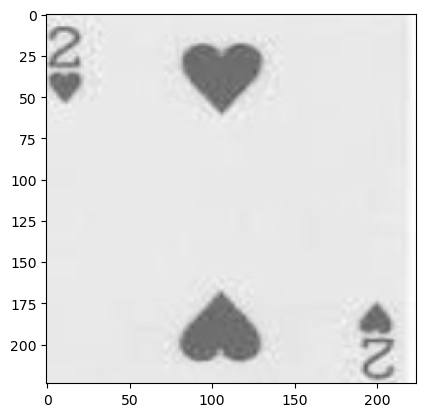


Image: train/two of hearts/116.jpg
Blur score: 37.45891324106429


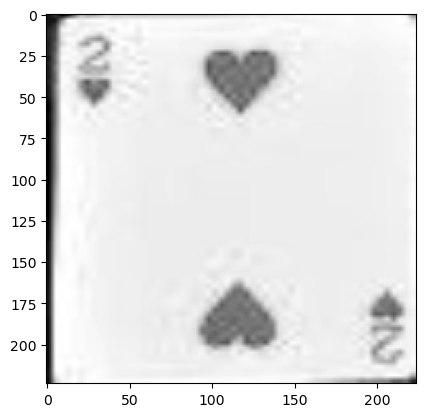


Image: train/two of hearts/151.jpg
Blur score: 36.963240099171706


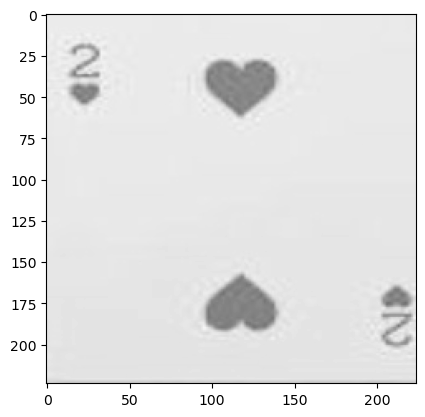


Image: train/two of hearts/152.jpg
Blur score: 42.01923181572739


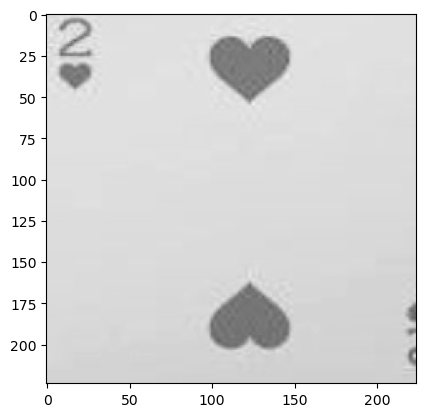


Image: train/two of spades/128.jpg
Blur score: 38.87910381827142


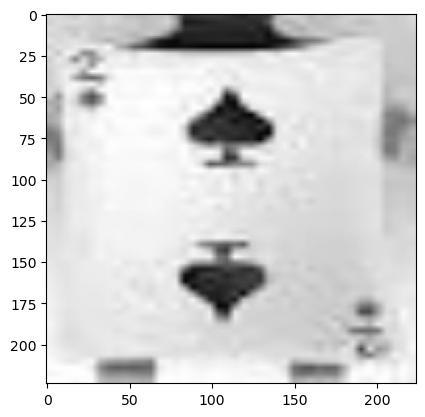


Image: train/two of spades/132.jpg
Blur score: 13.20397998113922


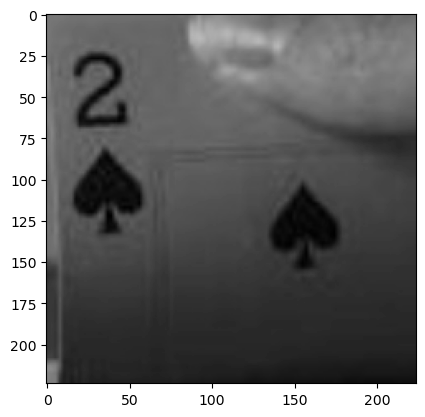


Image: train/two of spades/147.jpg
Blur score: 47.60415336580288


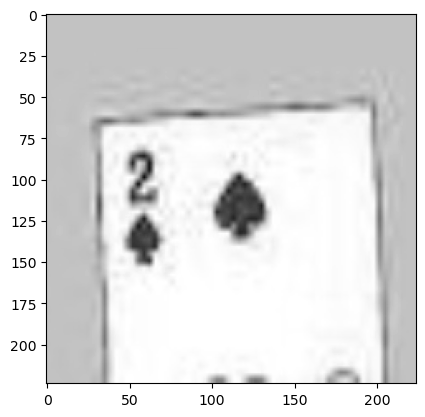

In [49]:
# Check if there are any blurry images
# Consider excluding blurry images with a blur score of 50 or less

def variance_of_laplacian(image):
  return cv2.Laplacian(image, cv2.CV_64F).var()

for card in path_df['filepaths']:
    filename = 'Dataset/' + card
    if os.path.isfile(filename):
        image = cv2.imread(filename)
        gray = convert_to_grayscale(image)  # Convert images to grayscale
        blur_score = variance_of_laplacian(gray)  # The higher the blur score, the sharper the image

        if blur_score < 50: 
            print(f"Image: {card}")
            print(f"Blur score: {blur_score}")
            plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
            plt.show()
            print()  
    else:
        continue